In [1]:
import pandas as pd
import yfinance as yf
stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
print(stk_data.head())

C:\Users\tiruk\AppData\Local\Temp\ipykernel_17260\620575181.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High         Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                     
2021-06-01   987.374939  1002.443448  977.177463   986.054707    28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442    24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856    23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425    14468646
2021-06-07  1014.006470  1020.653023  994.704227  1002.443367    16336573


In [2]:
dataset = pd.read_csv("reliance_data.csv", skiprows=1)

In [3]:
import pandas as pd
# Flatten column MultiIndex if exists
if isinstance(stk_data.columns, pd.MultiIndex):
    stk_data.columns = [col[0] for col in stk_data.columns]

# Check data
print("Data fetched successfully!")
print(stk_data.head())

Data fetched successfully!
                  Close         High         Low         Open    Volume
Date                                                                   
2021-06-01   987.374939  1002.443448  977.177463   986.054707  28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442  24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856  23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425  14468646
2021-06-07  1014.006470  1020.653023  994.704227  1002.443367  16336573


In [4]:
stk_data

,Close,High,Low,Open,Volume
Date,,,,,
2021-06-01,987.374939,1002.443448,977.177463,986.054707,28013832
2021-06-02,1002.101929,1005.857676,981.957442,981.957442,24630162
2021-06-03,1005.925903,1024.294928,999.757398,1011.092856,23974257
2021-06-04,997.208069,1009.021575,994.362780,1008.270425,14468646
2021-06-07,1014.006470,1020.653023,994.704227,1002.443367,16336573
...,...,...,...,...,...
2022-04-25,1231.155029,1260.117952,1216.833432,1252.808769,17063215
2022-04-26,1267.998291,1276.837970,1236.956766,1238.007426,12227666
2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988,19338945


In [5]:
column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (228, 1)


In [7]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.053449179090136925
maPe-Testset: 611961576876.1578
RMSE-Testset: 0.05357395571001213
maPe-Testset: 607932294635.3561
RMSE-Testset: 0.0536459439885617
maPe-Testset: 591163747547.8778
RMSE-Testset: 0.05357395571001213
maPe-Testset: 607932294635.3561


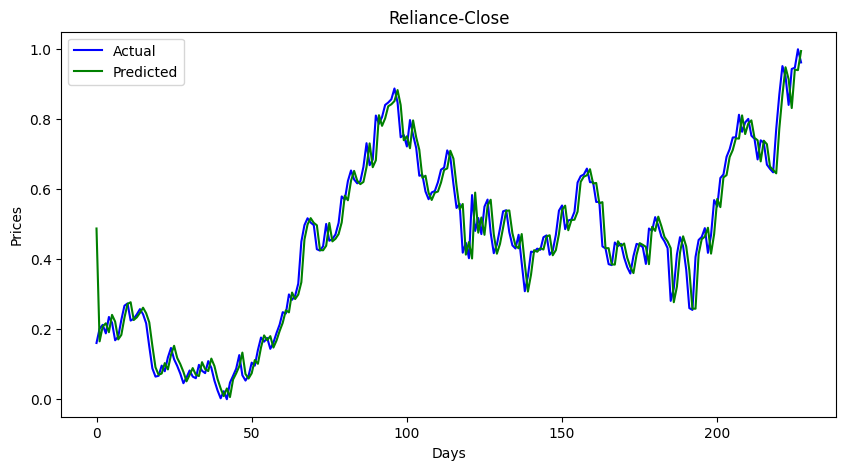

In [8]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [9]:
len(data1)

228

In [10]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

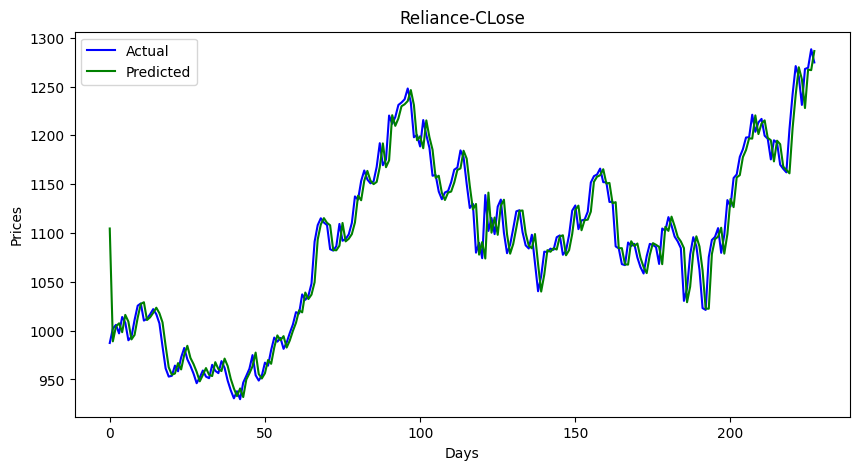

In [12]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [13]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 19.20119805505968
maPe-Testset: 0.012704820259511897


In [14]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [15]:
forecast

array([0.95335268, 0.94610422, 0.93896861, 0.93194409])

In [16]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [17]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [18]:
forecast_stock_price_test_oriF

,Closefore
0,1271.471533
1,1268.873644
2,1266.316201
3,1263.798575
